In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_wine=pd.read_csv("wine_dataset.csv")
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


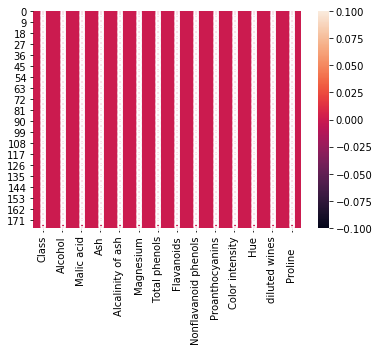

In [2]:
sns.heatmap(df_wine.isnull(),annot=True)
plt.show()

In [3]:
df_wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [4]:
from scipy.stats import zscore
z_score=abs(zscore(df_wine))
print(df_wine.shape)
df_wine_final=df_wine.loc[(z_score<3).all(axis=1)]
print(df_wine_final.shape)

(178, 14)
(168, 14)


In [5]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

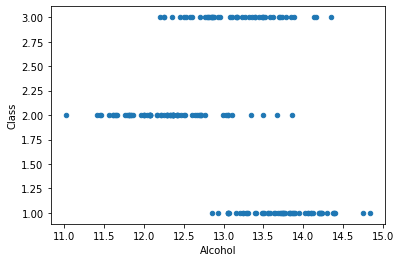

In [6]:
df_wine.plot.scatter(x='Alcohol',y='Class')

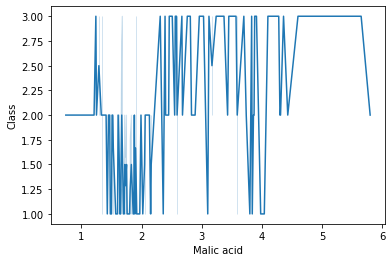

In [7]:
sns.lineplot(x="Malic acid",y="Class",data=df_wine)

In [8]:
Y=df_wine.iloc[:,0].values
X=df_wine.iloc[:,1:13].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [10]:
df_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
ppn = Perceptron(max_iter = 1500, eta0 = 0.1, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [13]:
from sklearn.linear_model import LogisticRegression
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [14]:
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]

Classification report: 
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [15]:
from sklearn.svm import SVC
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

